# Importing Necessary Libraries 

In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset

x = pd.read_csv("main_loan_base.csv")
x1 = pd.read_csv("monthly_balance_base.csv")
x2 = pd.read_csv("repayment_base.csv")
x_test = pd.read_csv("test_main_loan_base.csv")
x_test1 = pd.read_csv("test_monthly_balance_base.csv")
x_test2 = pd.read_csv("test_repayment_base.csv")

# Data understanding and cleaning

In [3]:
x.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [4]:
x.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
21289,LN71338286,Nishith Jha,68/54\nChad\nNarasaraopet-984944,Car,699781,105929.40,1,4,22,53,5,12.7,15814.91,2013-03-16,2016-07-28
48685,LN93436010,Ivan Datta,"H.No. 56, Magar Road\nNew Delhi-026379",Two-Wheeler,105628,26294.93,0,1,8,135,5,12.9,2397.96,2020-06-18,2024-06-24
42427,LN22918265,Siya Choudhry,"52, Sarkar Ganj, Bhubaneswar-844435",Personal,326573,30188.32,2,2,4,217,4,14.6,9022.69,2014-12-18,2017-08-04
42568,LN73014701,Riya Savant,"73/12, Chahal Marg\nKadapa 896628",Car,493473,48916.83,5,3,7,88,2,14.9,23903.41,2014-07-18,2015-03-17
5721,LN85153166,Kavya Bora,"82/916, Kunda Path\nLucknow-325838",Car,983530,90455.73,0,2,14,44,3,12.1,32714.27,2021-08-12,2022-12-27


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [6]:
x['disbursal_date'] = pd.to_datetime(x['disbursal_date'], infer_datetime_format=True)
x['default_date'] = pd.to_datetime(x['default_date'], infer_datetime_format=True)

In [7]:
x_test['disbursal_date'] = pd.to_datetime(x_test['disbursal_date'], infer_datetime_format=True)
x_test['default_date'] = pd.to_datetime(x_test['default_date'], infer_datetime_format=True)

In [8]:
#Ceating a new dataset with no or zero duplicates.
x = x[~x['loan_acc_num'].duplicated()]
print(x.shape)

(49985, 15)


In [9]:
#Creating a new dataset with no or zero duplicates.
x_test = x_test[~x_test['loan_acc_num'].duplicated()]
print(x_test.shape)

(9997, 15)


In [10]:
#Checking the repayment base dataset
x2.sample(5)

,loan_acc_num,repayment_amount,repayment_date
465182,LN78306717,1009.820000,2019-05-04
13103,LN94808432,4879.830000,2016-08-04
469822,LN50741818,10534.610000,2016-11-25
355633,LN62104187,10745.670000,2014-10-06
268700,LN89293379,2127.051188,2015-09-16


In [11]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


#### No nulls found in the above dataset

In [12]:
x2['loan_acc_num'].nunique()

46008

In [13]:
#Rounding off the amount to 2 decimal places

x2 = round(x2.groupby('loan_acc_num')['repayment_amount'].sum(),2)
x2 = pd.DataFrame({"loan_acc_num":x2.index, "repayment_amount":x2.values})
x2.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [14]:
#Rounding off the amount to 2 decimal places

x_test2 = round(x_test2.groupby('loan_acc_num')['repayment_amount'].sum(),2)
x_test2 = pd.DataFrame({"loan_acc_num":x_test2.index, "repayment_amount":x_test2.values})
x_test2.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [15]:
x.shape

(49985, 15)

In [16]:
x2.shape

(46008, 2)

In [17]:
# Merging the datasets 

df = pd.merge(
    left=x,
    right=x2,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [18]:
# Merging the datasets

df_test = pd.merge(
    left=x_test,
    right=x_test2,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [19]:
df.shape

(49985, 16)

In [20]:
#deriving the target

df['target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [21]:
df.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
33369,LN11665700,Hrishita Sinha,"80/13, Garg Circle\nVijayawada 566104",Car,360821,58014.90,0,0,0,153,5,10.8,7809.18,2020-05-16,2022-10-24,283313.10,0.054024
16271,LN53367292,Siya Kulkarni,"28\nRao Zila, Tiruppur 861838",Car,1712414,141641.84,4,4,26,68,4,12.5,45515.96,2014-12-06,2016-02-29,192286.60,0.804995
43034,LN64942335,Rati Grewal,"H.No. 02\nKrish Nagar, Katni 468392",Two-Wheeler,209892,47533.84,0,0,0,152,2,14.0,10077.52,2016-10-17,2017-04-29,146411.21,0.075977
16906,LN89222399,Jiya Banerjee,120\nWadhwa Chowk\nSri Ganganagar-624272,Two-Wheeler,230890,19169.98,5,1,13,34,5,14.9,5480.74,2012-02-17,2016-02-22,137018.50,0.323537
8744,LN32590052,Baiju Kothari,"H.No. 87, Ratti, Nashik 769264",Personal,95168,7599.55,0,1,13,75,4,11.4,2478.19,2020-01-05,2023-06-26,46187.17,0.434823


In [22]:
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [23]:
df_test.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
dtype: int64

In [24]:
#Imputing the null values 

df['repayment_amount'] = df['repayment_amount'].fillna(0)

#Imputing the null values 
df_test['repayment_amount'] = df_test['repayment_amount'].fillna(0)

#Imputing the null values 
df['target'] = df['target'].fillna(df['target'].mean())

#Creating a new variable 
df['due'] = df['loan_amount'] - df['repayment_amount']

#creating new variable
df_test['due'] = df_test['loan_amount'] - df_test['repayment_amount']

In [25]:
x1.sample(5)

,loan_acc_num,date,balance_amount
2634021,LN95195213,2021-05-10,27911.925120
2619106,LN26573402,2018-07-11,12740.776674
3109423,LN23163041,2011-11-06,44367.908375
363799,LN74925376,2014-02-13,5735.678511
3716596,LN40693293,2006-06-10,6261.749596


In [26]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [27]:
x1['loan_acc_num'].nunique()

49671

In [28]:
#Rounding off the values to 2 decimal places 

x1 = round(x1.groupby('loan_acc_num')['balance_amount'].mean(),2)
x1 = pd.DataFrame({"loan_acc_num":x1.index, "average_monthly_balance":x1.values})
x1.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [29]:
#Rounding off the values to 2 decimal places 

x_test1 = round(x_test1.groupby('loan_acc_num')['balance_amount'].mean(),2)
x_test1 = pd.DataFrame({"loan_acc_num":x_test1.index, "average_monthly_balance":x_test1.values})
x_test1.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


In [30]:
#Merging the other datasets

data = pd.merge(
    left=df,
    right=x1,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [31]:
#Merging the datasets

data_test = pd.merge(
    left=df_test,
    right=x_test1,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [32]:
data.shape

(49985, 19)

In [33]:
data_test.shape

(9997, 18)

In [34]:
data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [35]:
#Imputing the null values with mean

data['average_monthly_balance'] = data['average_monthly_balance'].fillna(data['average_monthly_balance'].mean())

In [36]:
#Imputing the null values with mean

data_test['average_monthly_balance'] = data_test['average_monthly_balance'].fillna(data_test['average_monthly_balance'].mean())

In [37]:
data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [38]:
data_test.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
due                        0
average_monthly_balance    0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

### Imputed the nulls and there are no nulls as of now

In [40]:
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


In [41]:
#Dropping negative LGD

data = data.drop(data[data['target']<0].index)

In [42]:
test_copy = data_test.copy()

# EDA

In [43]:
#Segregating the numerical and categorical variables

data_numerical = data.select_dtypes(include=[np.number])
data_categorical = data.select_dtypes(exclude=[np.number])

In [44]:
#Variables that are correlated i.e. top 10

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Absolute Correlation")
print(get_top_abs_correlations(data_numerical, 10))

Absolute Correlation
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


In [45]:
#Printing and rounding off to 2 decimal places the averages

from statistics import mean

print("Avg Monthly EMI: ",round(mean(data['monthly_emi']),2))
print("Avg Repayment Amount: ",round(mean(data['repayment_amount']),2))
print("Avg Loan Amount: ",round(mean(data['loan_amount']),2))

Avg Monthly EMI:  16553.64
Avg Repayment Amount:  150993.26
Avg Loan Amount:  381630.43


## Univariate Analysis

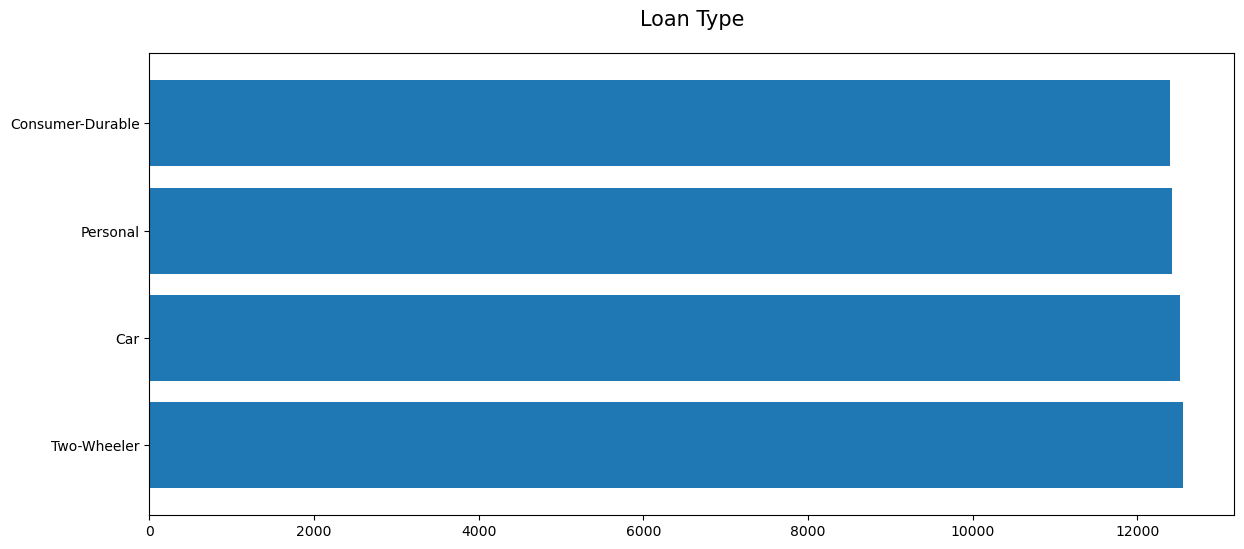

In [46]:
#Plotting type of loans

plt.figure(figsize = [14,6])
data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Loan Type", fontdict={"fontsize":15}, pad =20)
plt.show()

In [47]:
def Uni_Analysis_Numerical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')

    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distribution plot')
    plt.show()

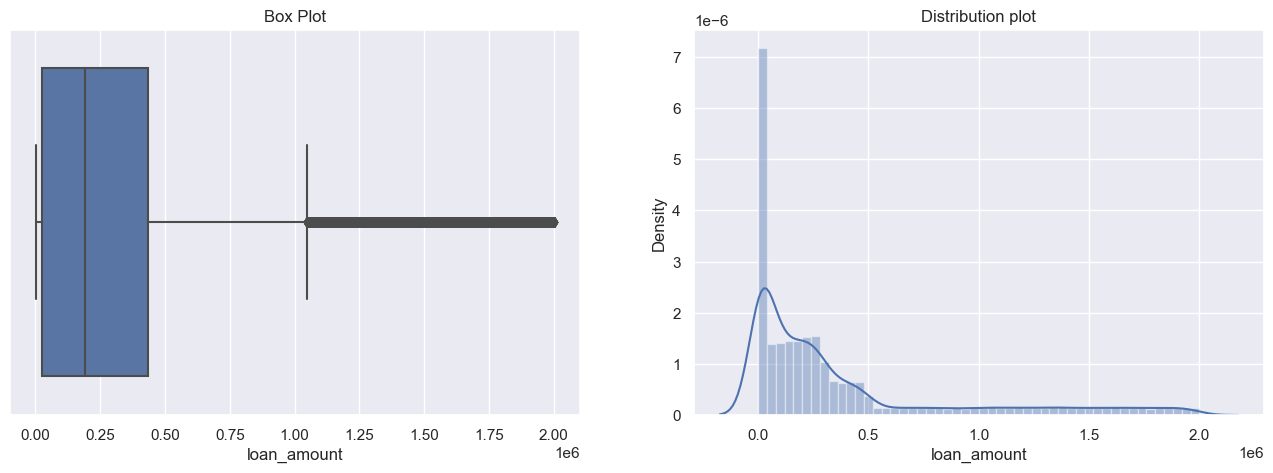

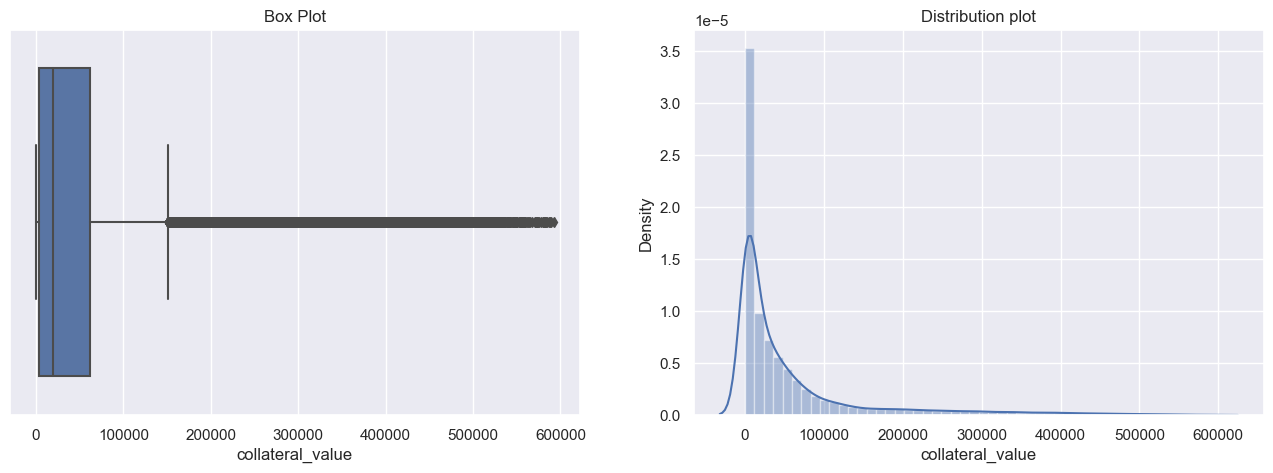

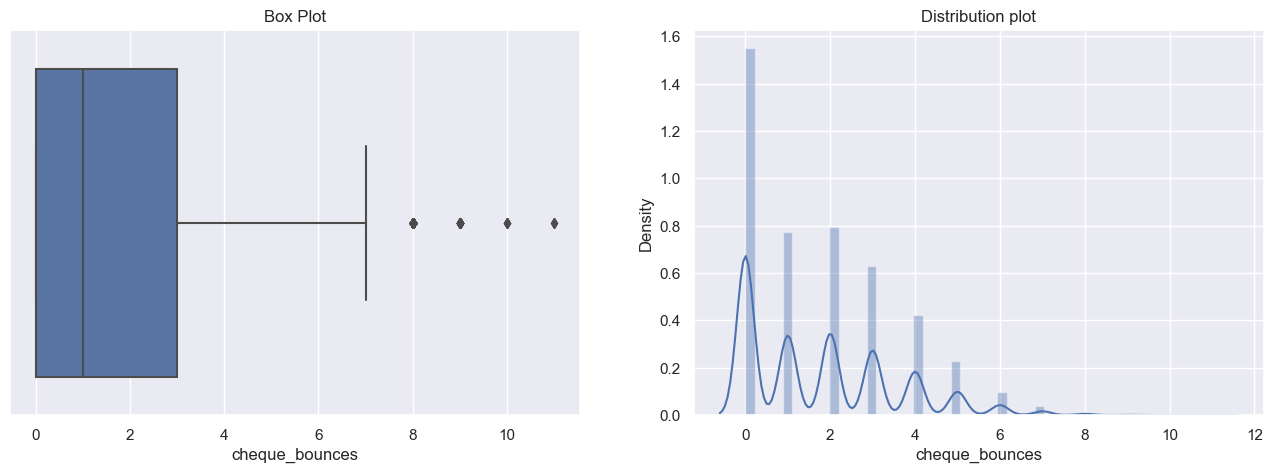

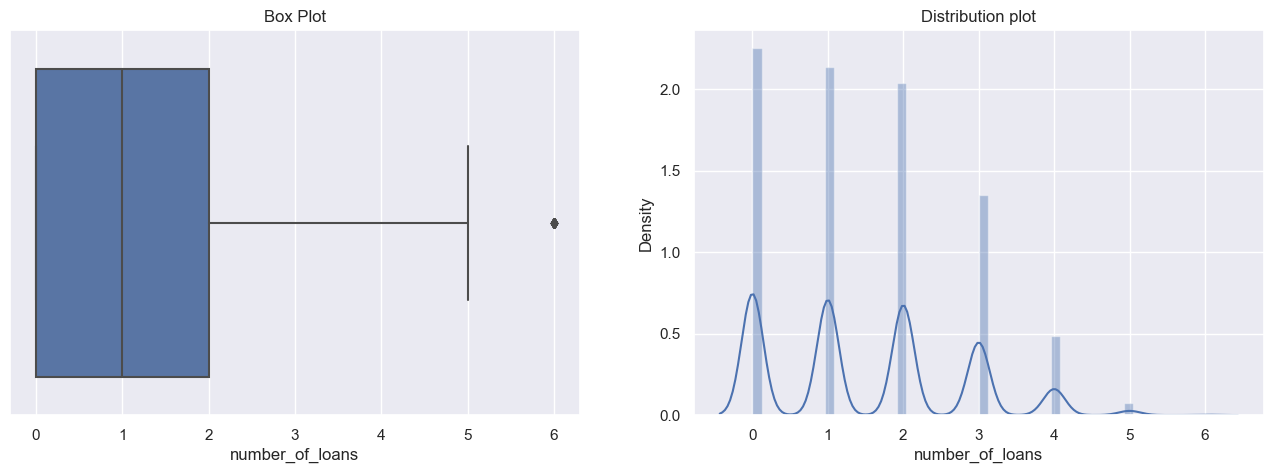

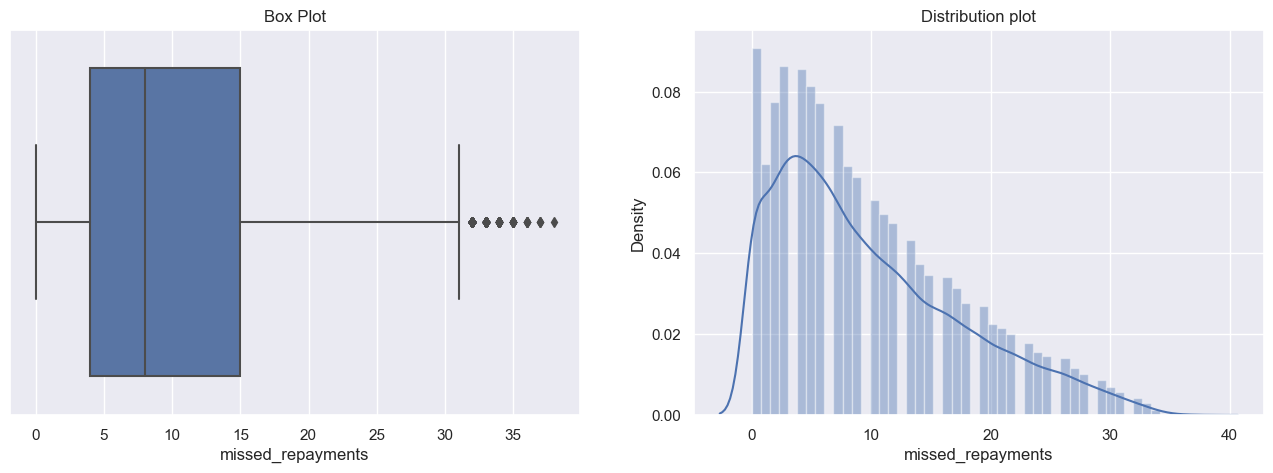

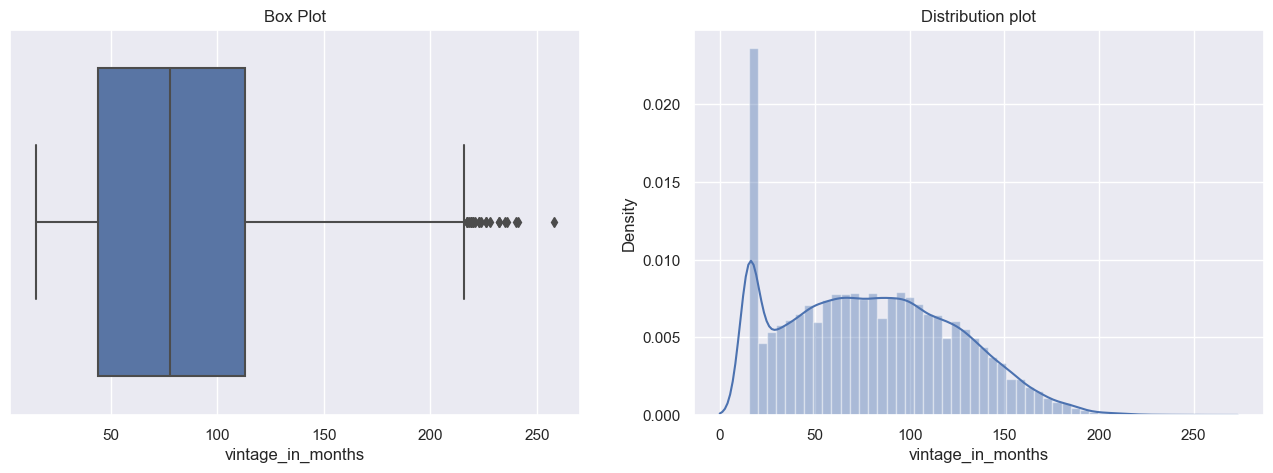

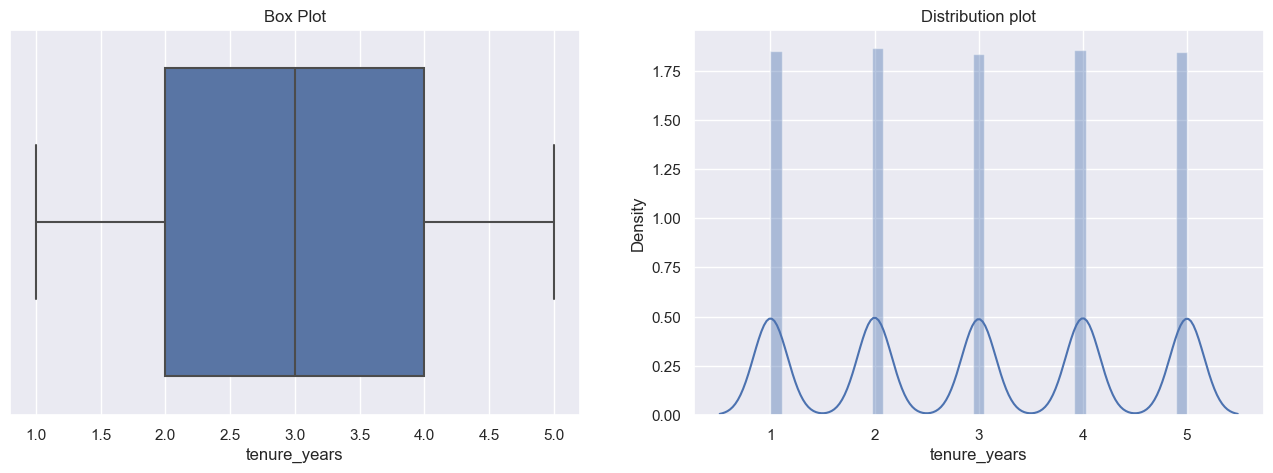

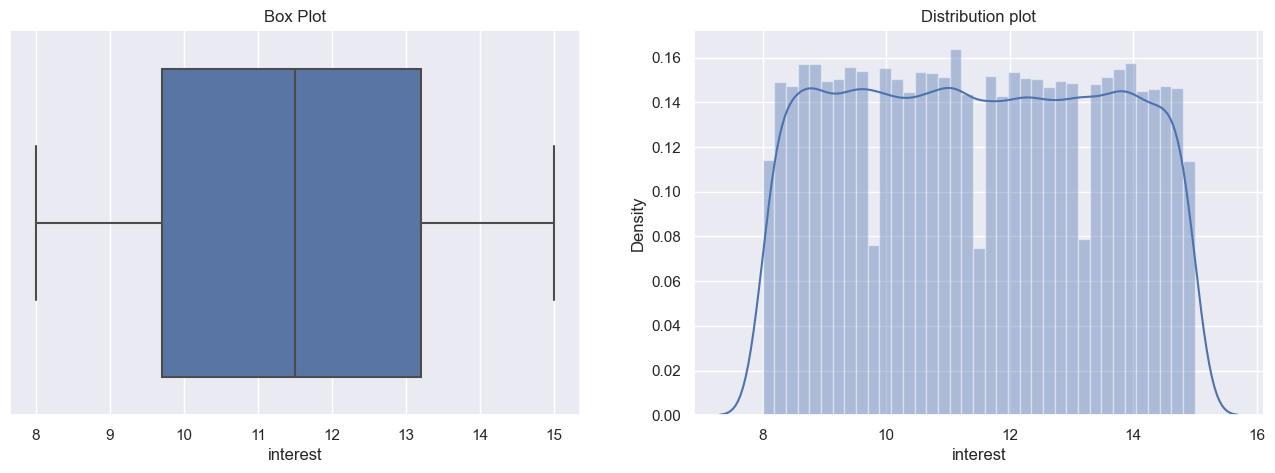

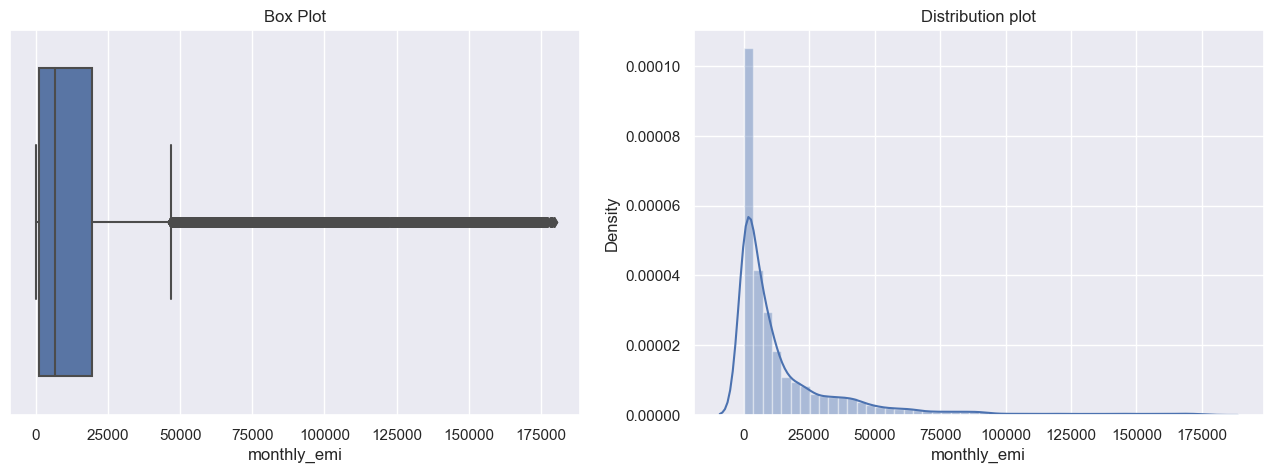

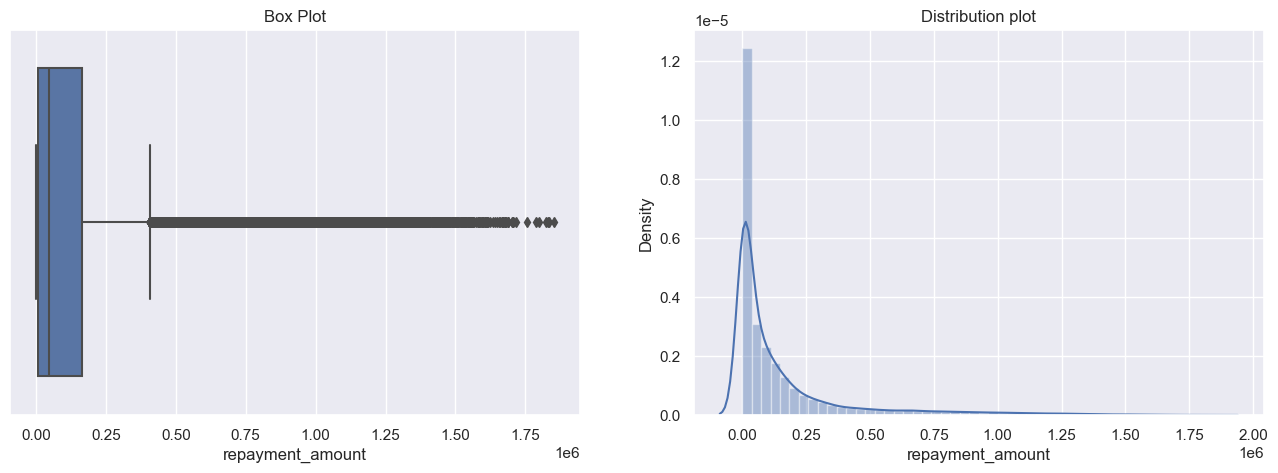

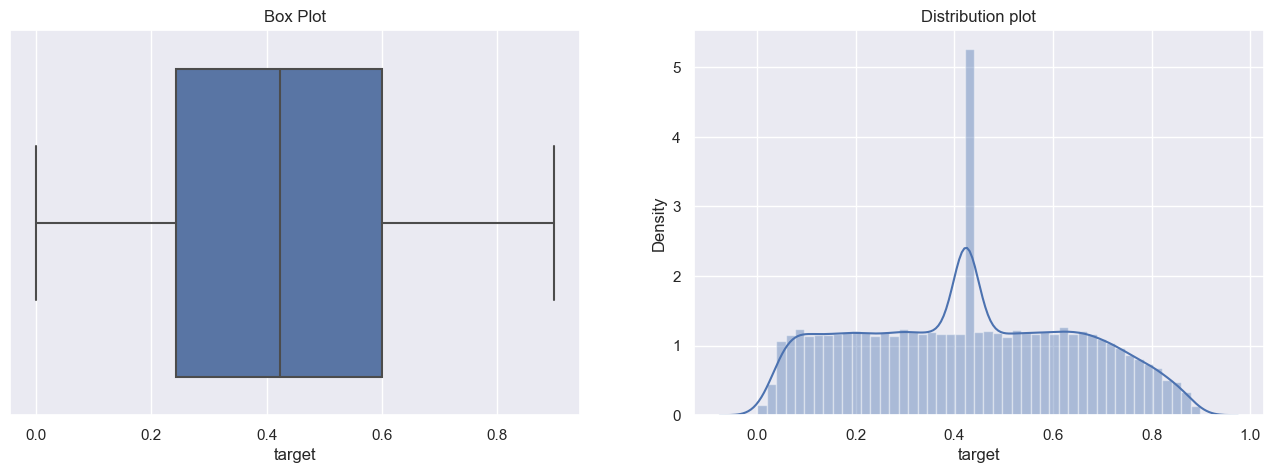

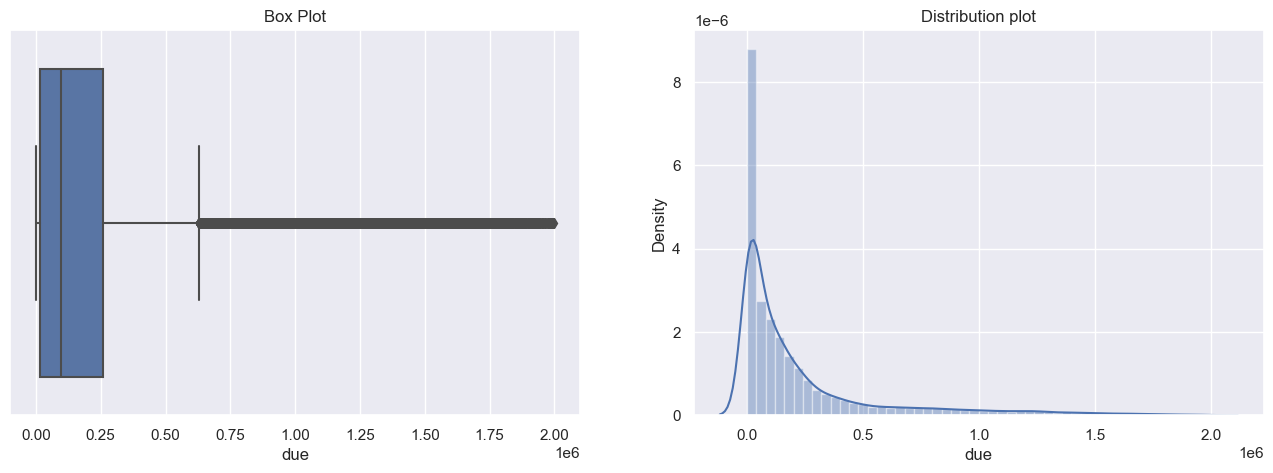

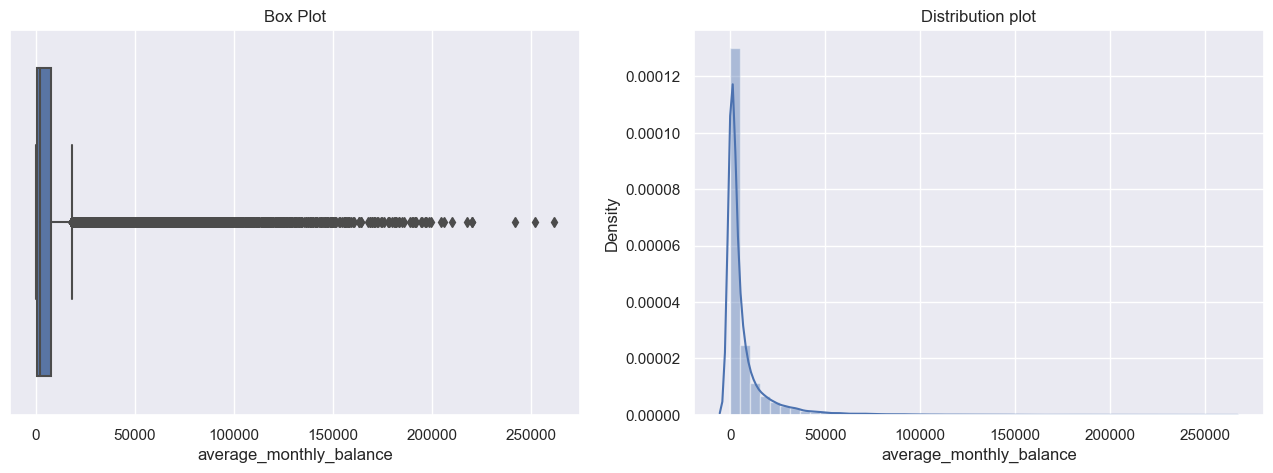

In [48]:
#Distribution of the numerical variables

for i in data_numerical:
    Uni_Analysis_Numerical(data,i)

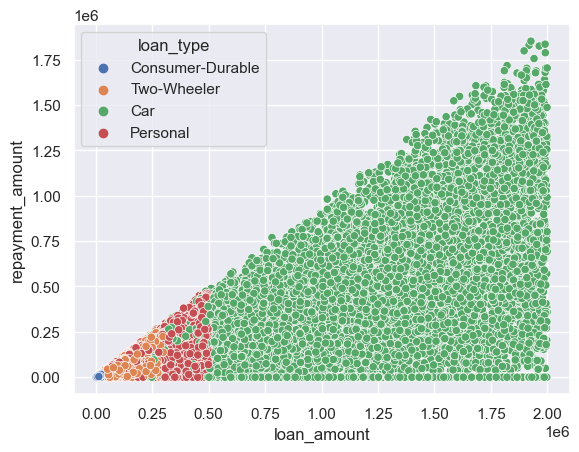

In [49]:
sns.scatterplot(x=data.loan_amount,
                y = data.repayment_amount,
                data=data,hue = 'loan_type')
plt.show()

### Interpretation
- The majority of the loan amount is for cars followed by personal

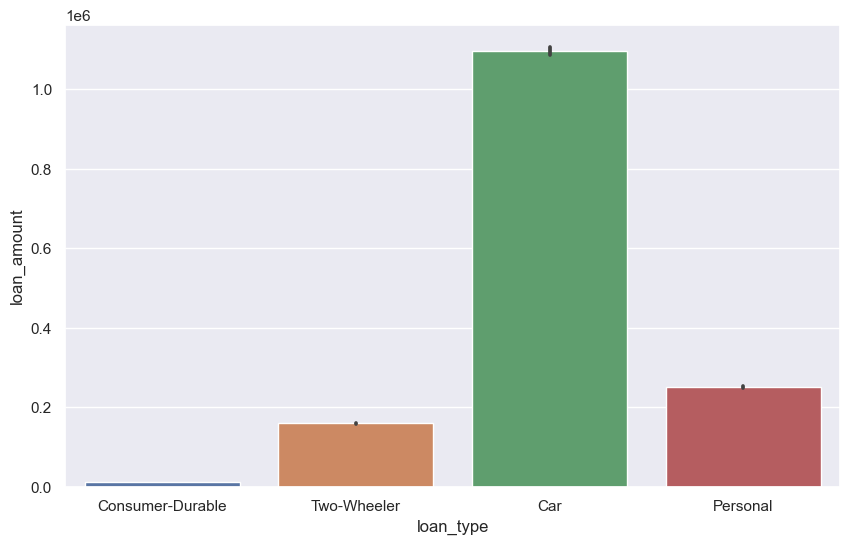

In [50]:
# plotting loan type

plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.loan_amount)
plt.show()

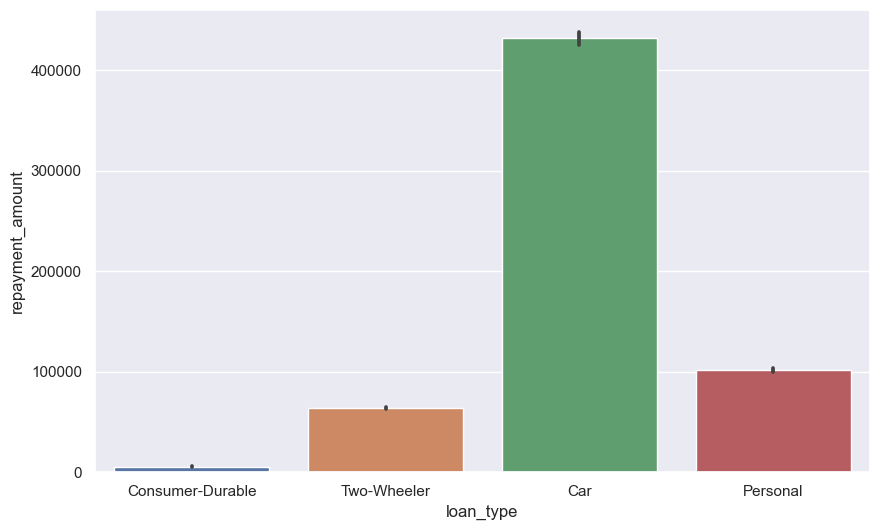

In [51]:
#Plotting repayment amount of the loan types

plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.repayment_amount)
plt.show()

### Interpretation

- From the above two plots, we can observe that the repayment amount and the loan amount is highest of cars

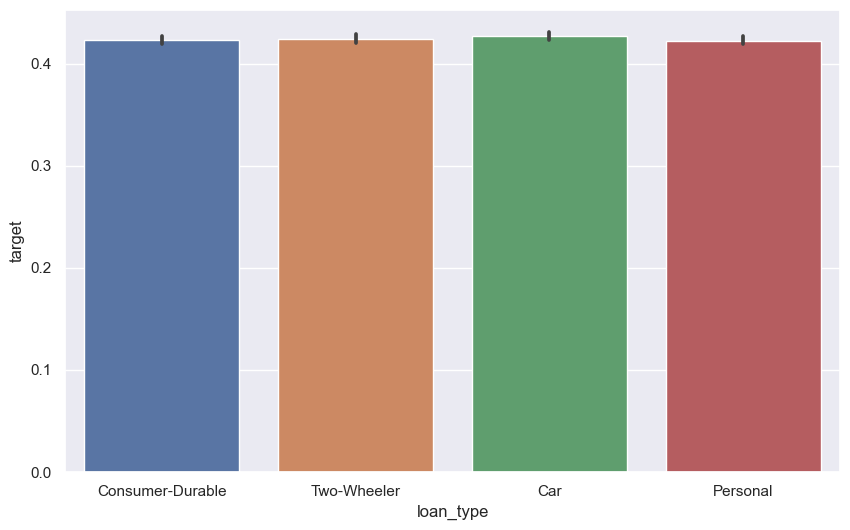

In [52]:
plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.target)
plt.show()

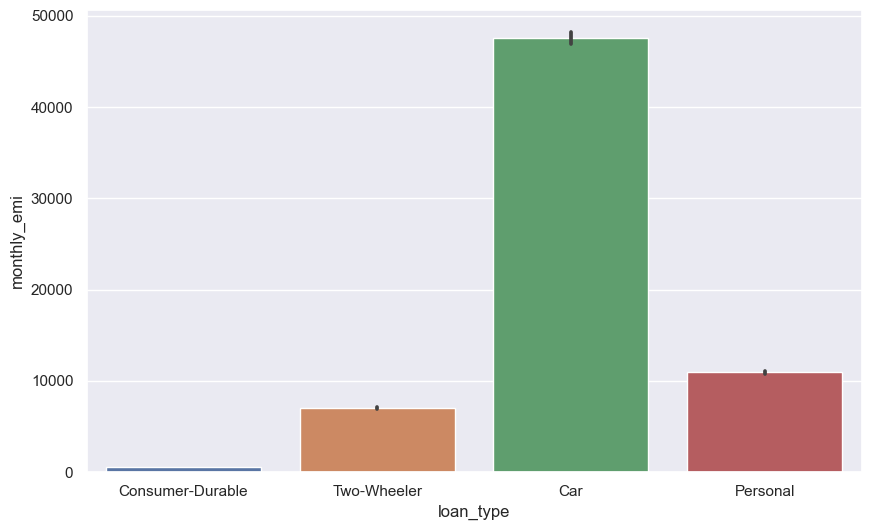

In [53]:
plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.monthly_emi)
plt.show()

### Interpretation

- While the loan amount is highest of cars, we can observe that the monthyl EMI is also the highest.

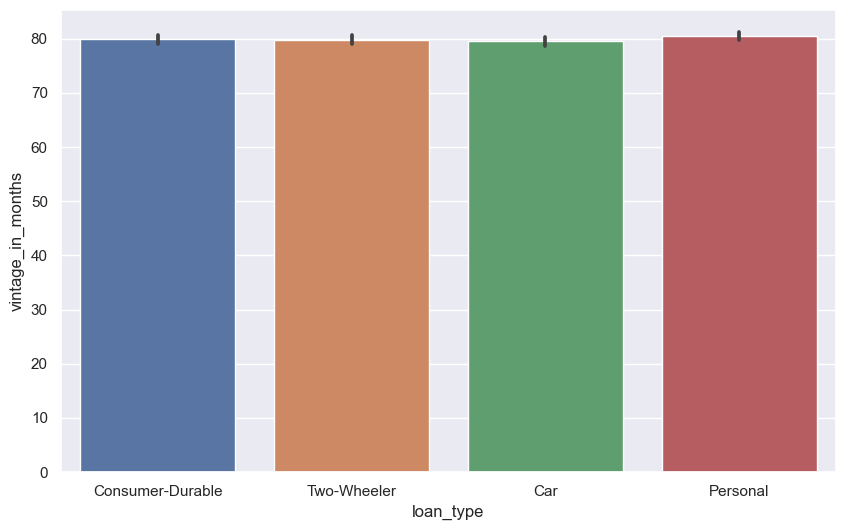

In [54]:
plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.vintage_in_months)
plt.show()

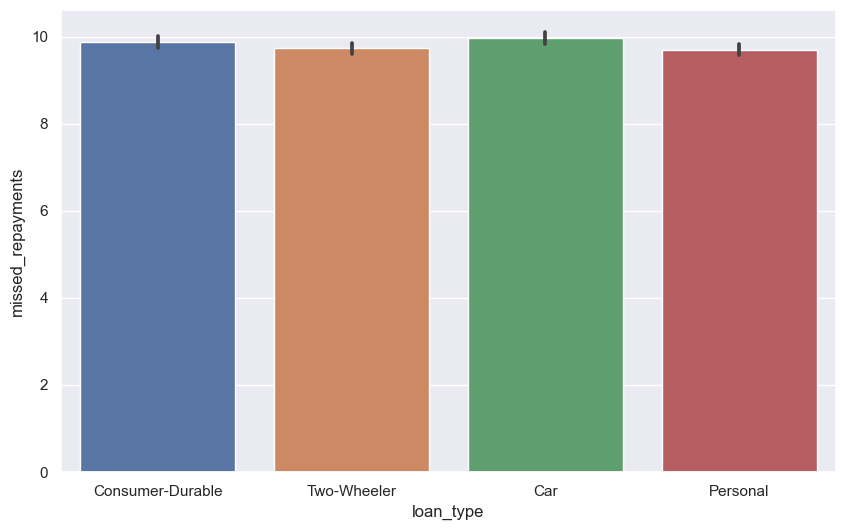

In [55]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.missed_repayments)
plt.show()

### Interpretation

- The missed repayments is also highest of cars

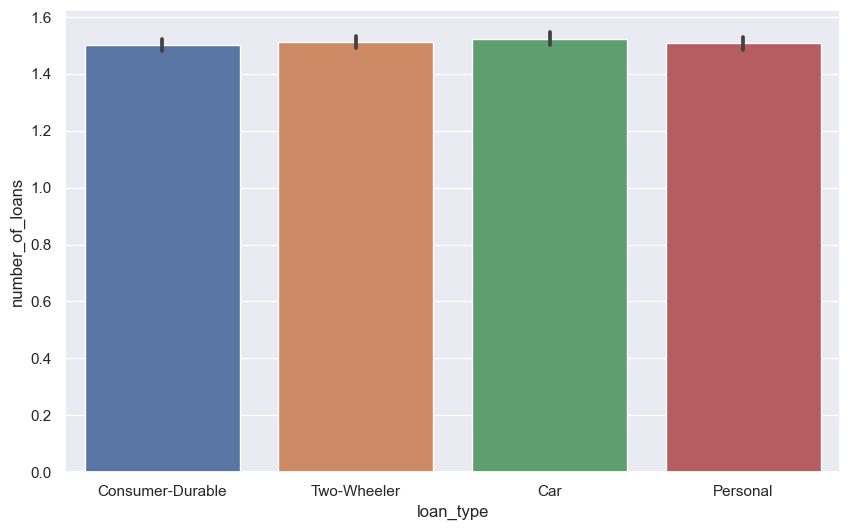

In [56]:
#Plotting no. of loans
plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.number_of_loans)
plt.show()

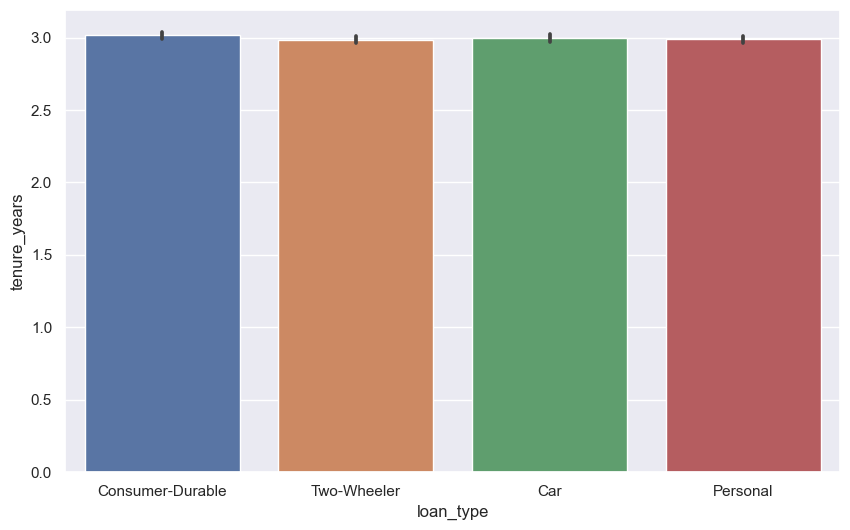

In [57]:
#Plotting the tenure of the loan types

plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.tenure_years)
plt.show()

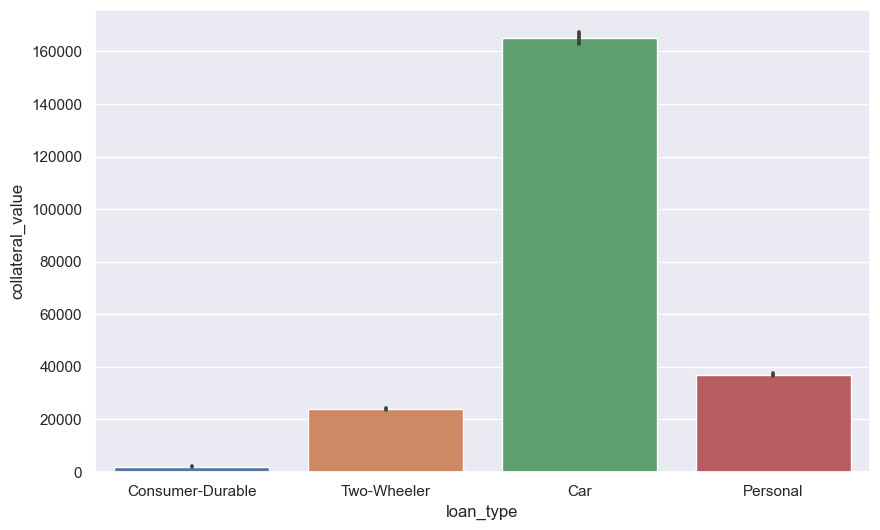

In [58]:
#Plotting the collateral value of the loan types

plt.figure(figsize = [10,6])
sns.barplot(x = data.loan_type,y = data.collateral_value)
plt.show()

### Interpretation

- The collateral value of the cars loan type is the highest followed by personal

In [59]:
#Segregating the numerical and categorical variables

data_numerical  = data.select_dtypes(include=[np.number])
data_categorical  = data.select_dtypes(exclude=[np.number])

<Figure size 2400x2400 with 0 Axes>

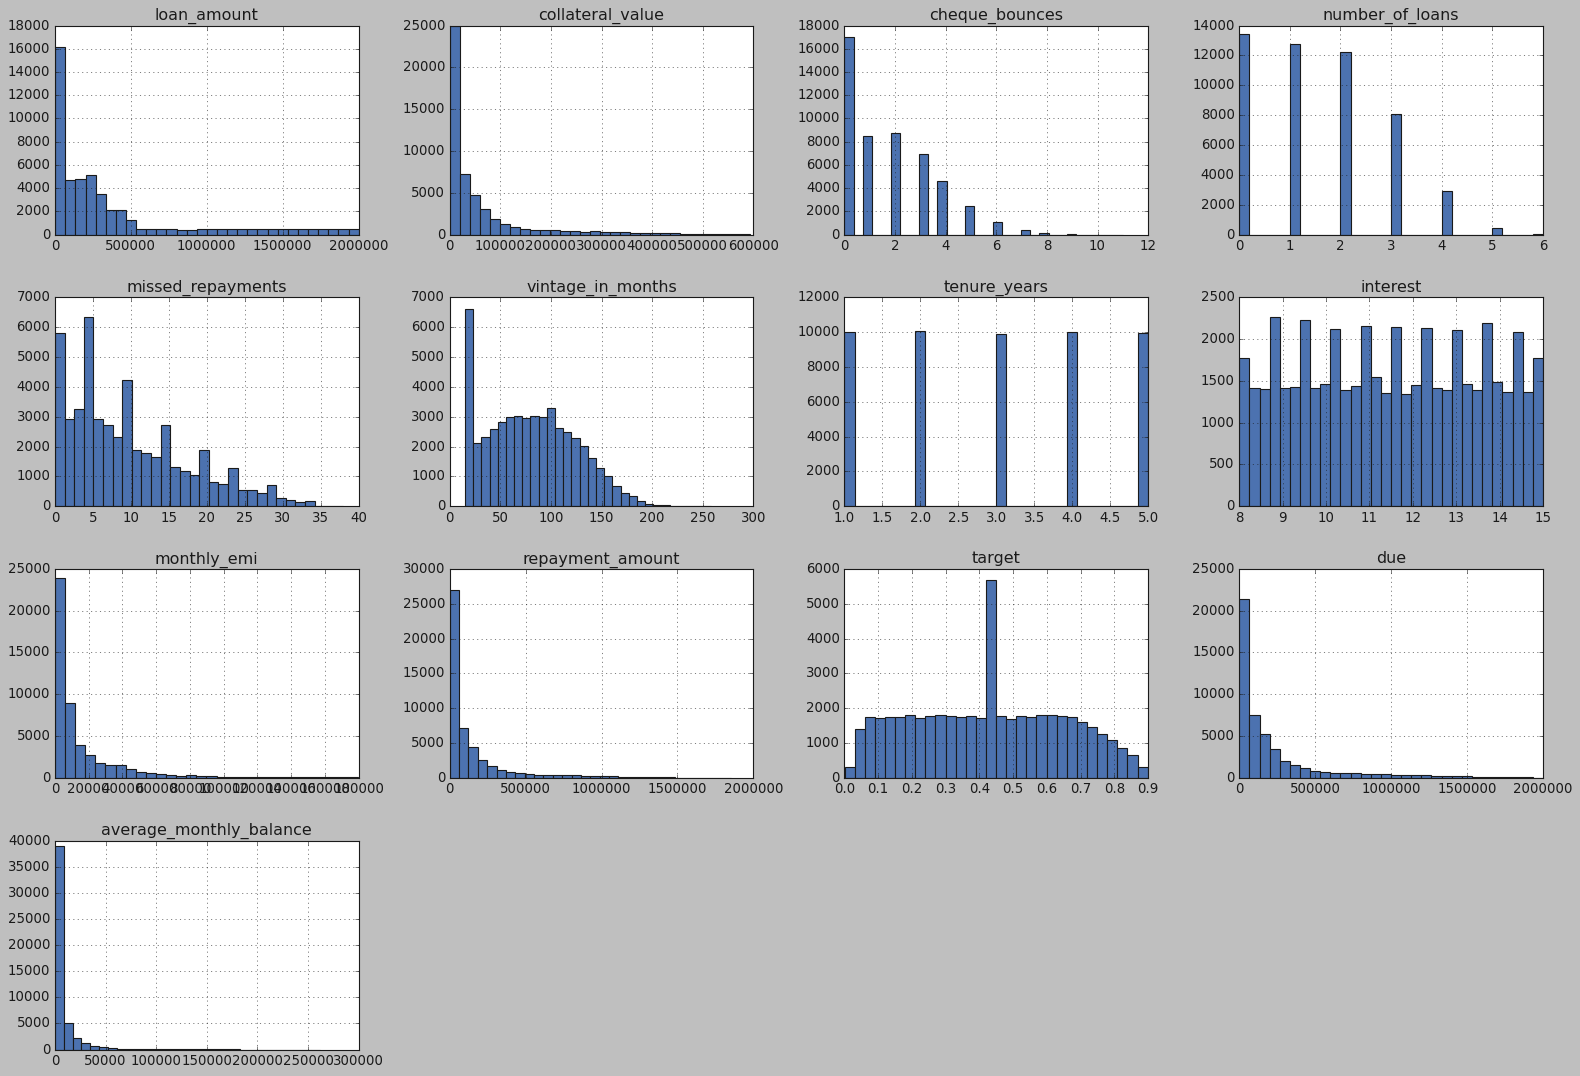

In [60]:

plt.figure(figsize = (24,24))
plt.style.use('classic')
data[data_numerical.columns].hist(bins=30, figsize = (24,16))
plt.show()

In [61]:
data_numerical.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance'],
      dtype='object')

<AxesSubplot:>

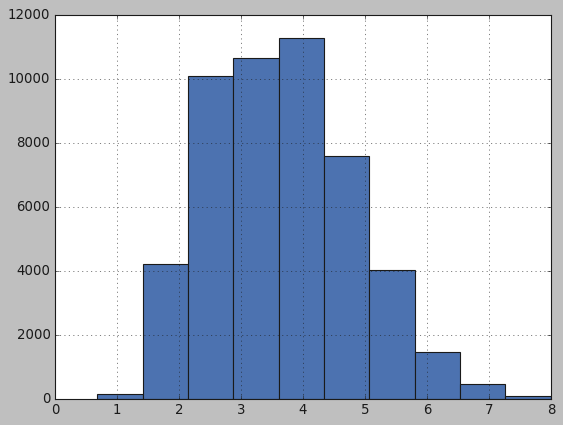

In [62]:
#Plotting the histogram of avg monthly balance
(data['average_monthly_balance']**(1/6)).hist()

<AxesSubplot:>

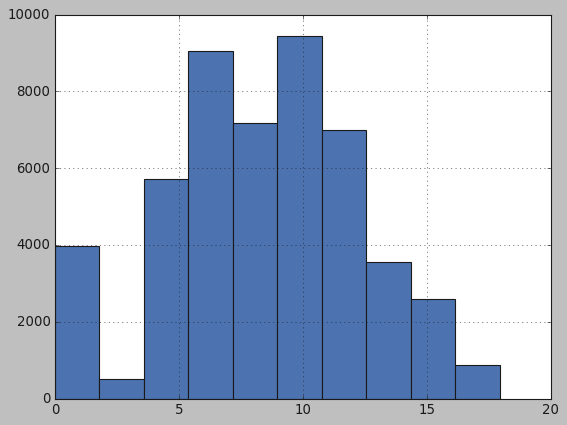

In [63]:
#Plotting the histogram of repayment amount
(data['repayment_amount']**(1/5)).hist()

In [64]:
data['loan_amount'] = data['loan_amount']**(1/5)
data['collateral_value'] = data['collateral_value']**(1/5)
data['cheque_bounces'] = data['cheque_bounces']**(1/2)
data['missed_repayments'] = data['missed_repayments']**(1/2)
data['vintage_in_months'] = data['vintage_in_months']**(1/2)
data['monthly_emi'] = data['monthly_emi']**(1/6)
data['repayment_amount'] = data['repayment_amount']**(1/5)
data['average_monthly_balance'] = data['average_monthly_balance']**(1/6)

In [65]:
data_test['collateral_value'] = data_test['collateral_value']**(1/5)
data_test['cheque_bounces'] = data_test['cheque_bounces']**(1/2)
data_test['missed_repayments'] = data_test['missed_repayments']**(1/2)
data_test['vintage_in_months'] = data_test['vintage_in_months']**(1/2)
data_test['monthly_emi'] = data_test['monthly_emi']**(1/6)
data_test['repayment_amount'] = data_test['repayment_amount']**(1/5)
data_test['average_monthly_balance'] = data_test['average_monthly_balance']**(1/8)

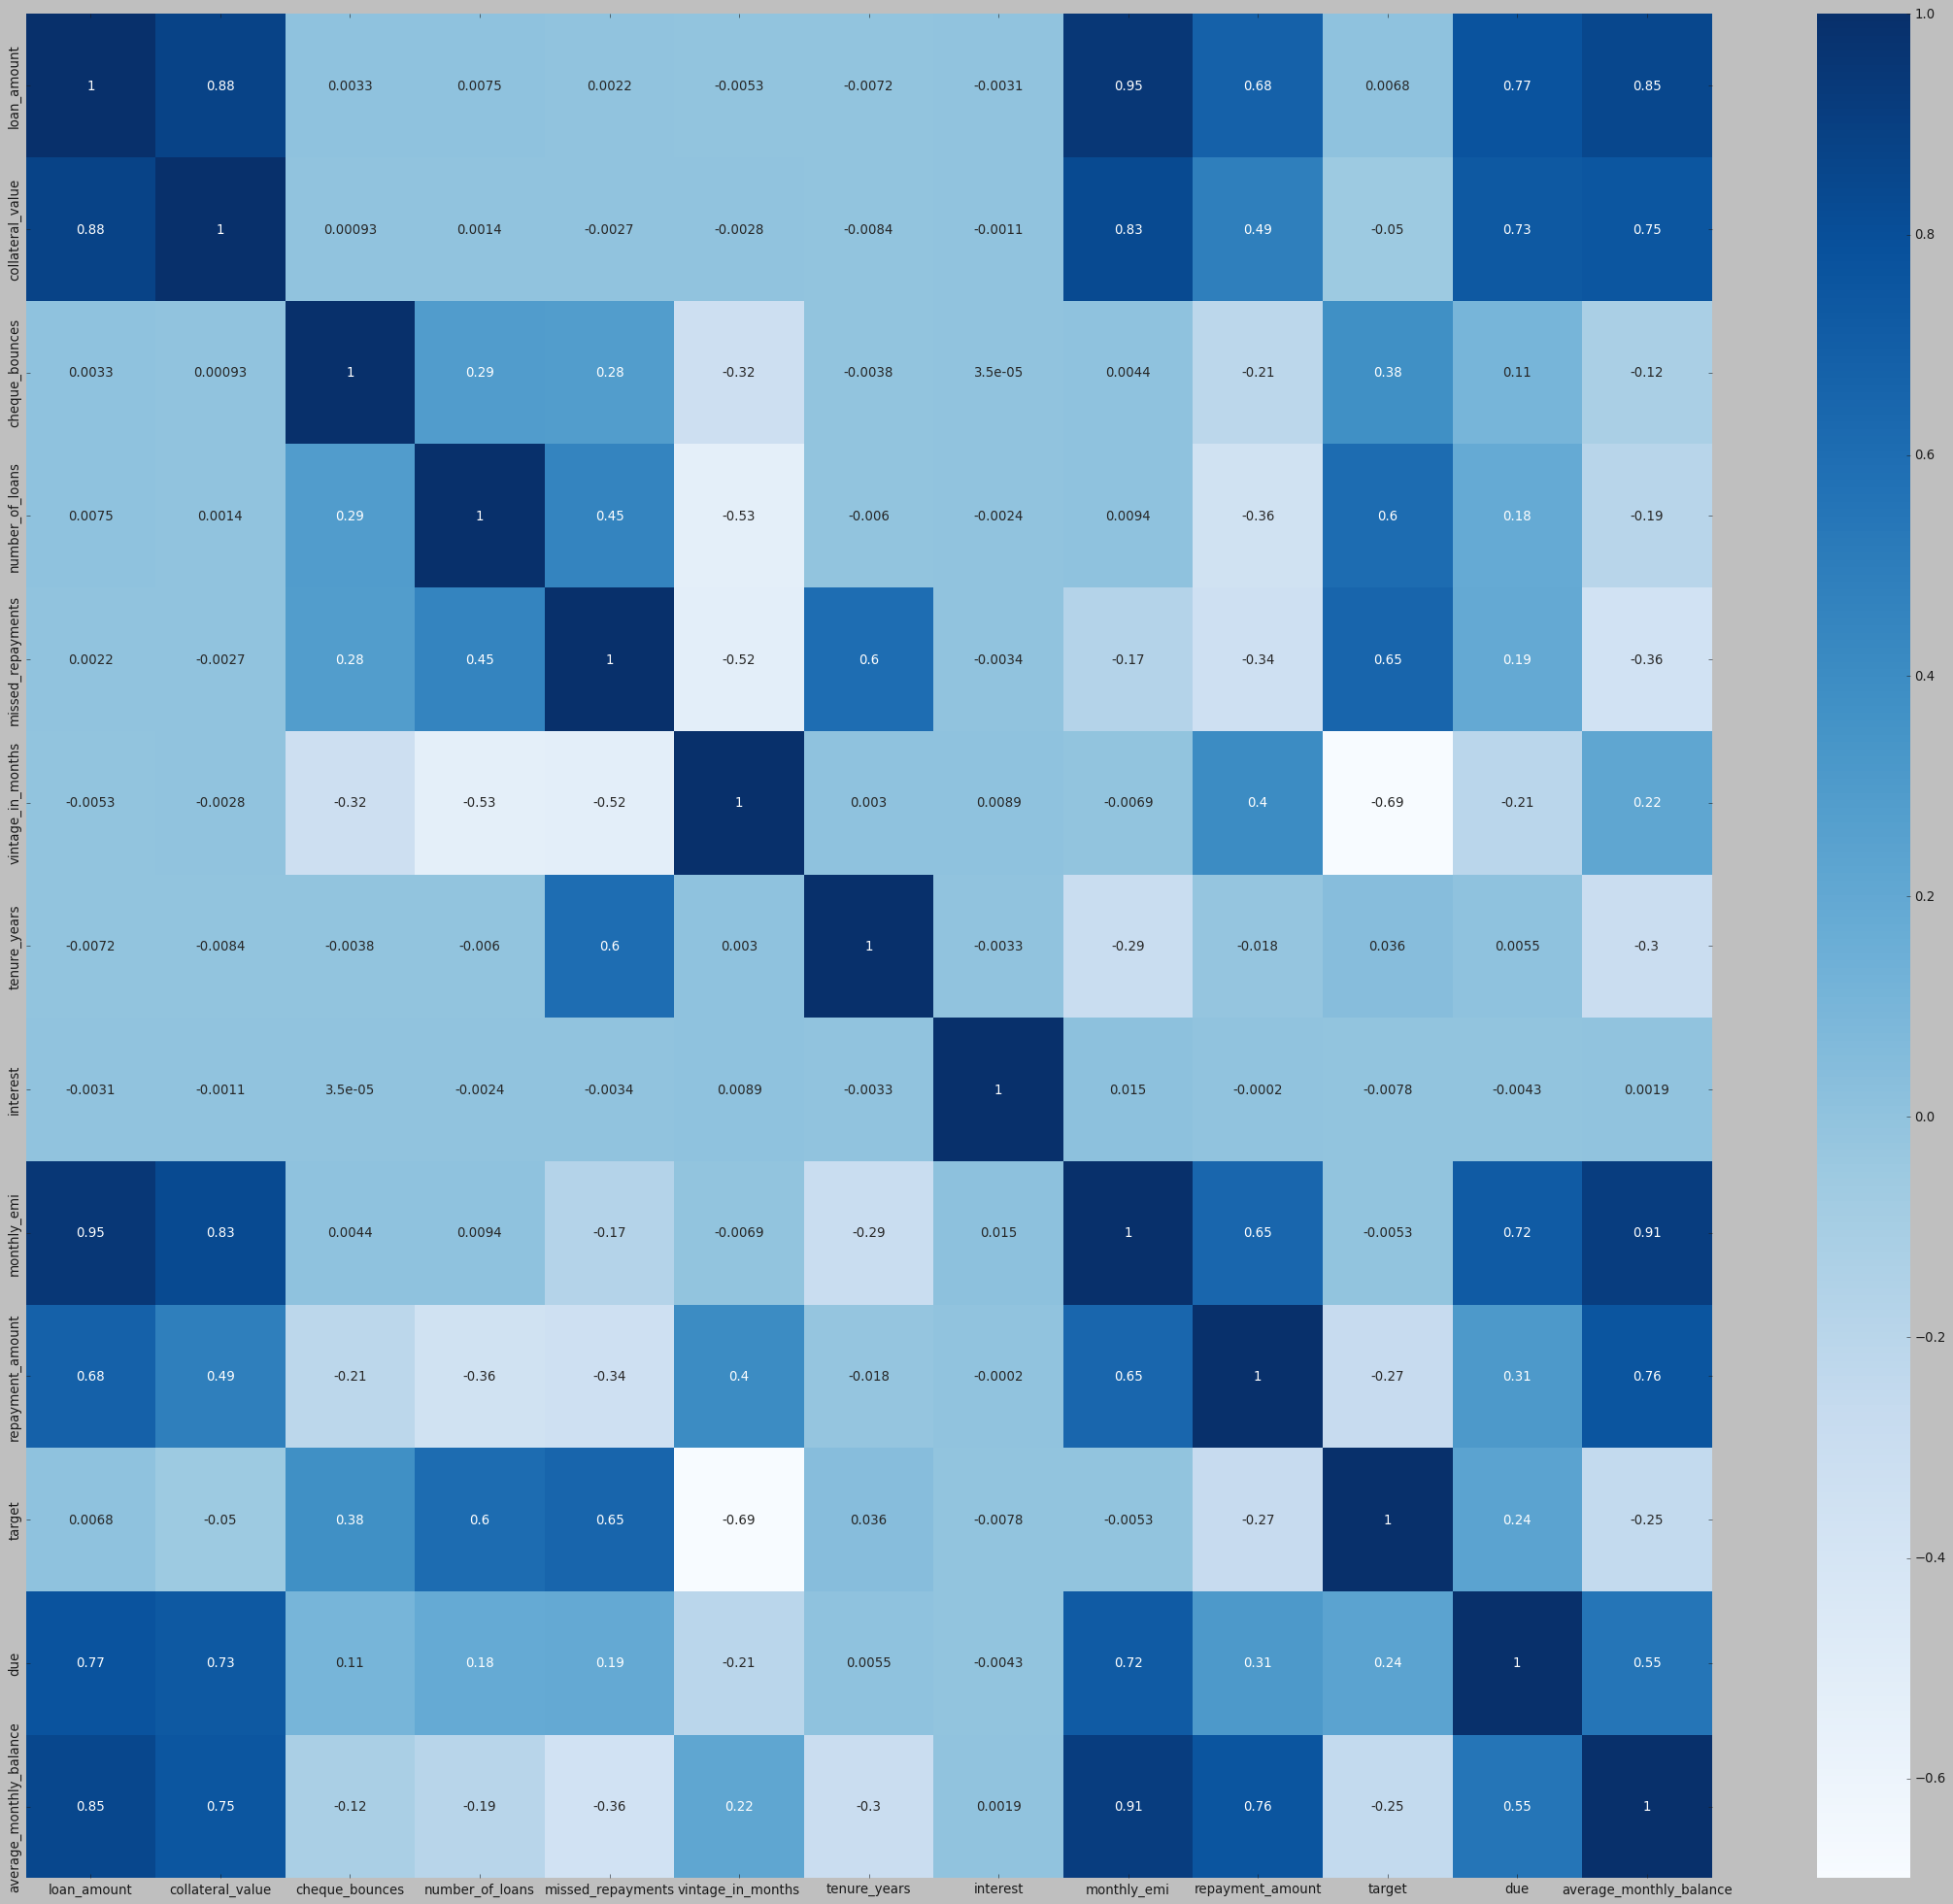

In [66]:
#Plotting the heatmap for correaltion check

plt.figure(figsize = (35,30))
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [67]:
data_categorical.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')

In [68]:
curr_time = pd.to_datetime("now")

In [69]:
#Using the date variable, deriving a new variable
data['difference'] = (curr_time-data['default_date'])/np.timedelta64(1,'D')

In [70]:
#Using the date variable, deriving a new variable
data_test['difference'] = (curr_time-data_test['default_date'])/np.timedelta64(1,'D')

In [71]:
#dropping unnecessary columns
data = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

In [72]:
#dropping unnecessary columns
data_test = data_test.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

## Model Building

In [73]:
dummies = pd.get_dummies(data['loan_type'],drop_first=True)

#performing the encoding

dummies_test  = pd.get_dummies(data_test['loan_type'],drop_first=True)

In [74]:
data = data.drop(['loan_type'],axis=1)
data_test = data_test.drop(['loan_type'],axis=1)

In [75]:
data = pd.concat([data,dummies],axis=1)
data_test = pd.concat([data_test,dummies_test],axis=1)

In [76]:
#Doing the train-test split

from sklearn.model_selection import train_test_split

X = data.drop(columns=['target'])
y = data [['target']]

# Choosing the random state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [77]:
#Scaling of the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
m1 = scaler.fit_transform(data_test)

In [79]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Recusrive Feature Elimination

In [80]:
# Using RFE with 10 variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [81]:
from sklearn.linear_model import *
from  sklearn import metrics

y_pred1 = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred1)

0.7756349800595066

# Using Multiple Linear Regression

In [82]:
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred1 = lm.predict(X_test)
metrics.r2_score(y_test, y_pred1)

0.7811962854570624

## Random Forest Regressor

In [83]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [84]:
y_train_pred = rf.predict(X_train)
print(r2_score(y_train, y_train_pred))

0.7245706459113583


In [85]:
y_test_pred = rf.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.7273636647483164


## Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters tuning

params2 = {
    'n_estimators': 500,
    'max_depth': 4,
    'min_samples_split': 4,
    'learning_rate': 0.01,
    'loss': 'squared_error'  
}

# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**params2)

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Print Coefficient of determination R^2
print("R squared: %.3f" % gbr.score(X_test, y_test))


R squared: 0.901


In [87]:
y_train_pred = gbr.predict(X_train)
print("Train Set R_squared : ",r2_score(y_train, y_train_pred))

Train Set R_squared :  0.9040959918040924


In [88]:
y_test_pred = gbr.predict(X_test)
print("Test Set R_squared: ",r2_score(y_test, y_test_pred))

Test Set R_squared:  0.9009826242325176


[0.00000000e+00 8.27642038e-03 6.29420805e-03 9.57308377e-02
 2.29346406e-01 4.55337925e-01 5.66951780e-02 0.00000000e+00
 2.61179097e-03 1.05657884e-01 3.97555164e-02 2.93833105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


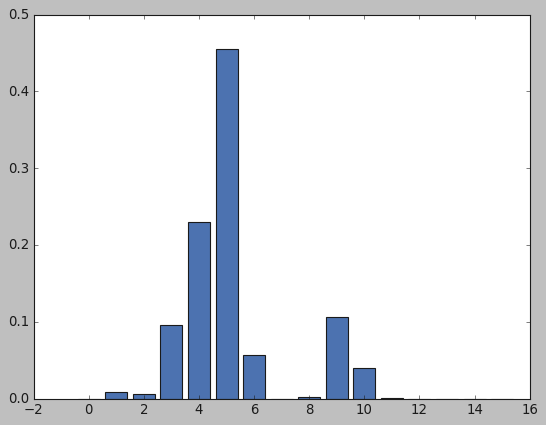

In [89]:
#Plotting feature importance

print(gbr.feature_importances_)


plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

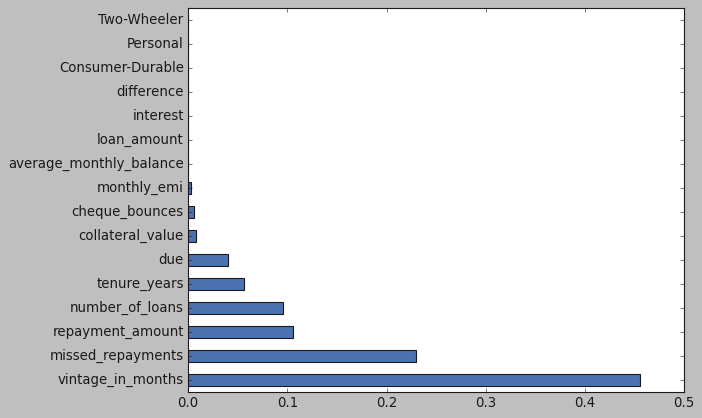

In [90]:
imp_f = pd.Series(gbr.feature_importances_, index=X.columns)
imp_f.nlargest(20).plot(kind='barh')

# Using XGBoost Regressor

In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [92]:
# Importing necessary libraries 

from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [93]:
m = XGBRegressor()

m1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model on train set

cv_scores = cross_val_score(m, X_train, y_train, scoring='r2', cv=m1, n_jobs=-1)

cv_scores = absolute(cv_scores)
print('R_squared value: %.3f (%.3f)' % (cv_scores.mean(), cv_scores.std()) )

R_squared value: 0.977 (0.001)


In [94]:
# Evaluation of the model on test set

cv_scores = cross_val_score(m, X_test, y_test, scoring='r2', cv=m1, n_jobs=-1)

cv_scores = absolute(cv_scores)
print('R_squared value: %.3f (%.3f)' % (cv_scores.mean(), cv_scores.std()) )

R_squared value: 0.970 (0.002)


In [95]:
from xgboost import XGBRegressor

m3 = XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [96]:
XGB = m3.fit(X_train,y_train)
pred = XGB.predict(X_train)
print("Train set score: ", r2_score(y_train, pred))
y_test_pred = XGB.predict(X_test)
print("Test set score: ", r2_score(y_test, y_test_pred))

Train set score:  0.8997984846286474
Test set score:  0.8964291662716752


## Adaboost Regressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor

ar = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
ab=ar.fit(X_train,y_train)
pred=ab.predict(X_train)
print("Train set score: ", r2_score(y_train, pred))
y_test_pred = ab.predict(X_test)
print("Test set score: ", r2_score(y_test, y_test_pred))

Train set score:  0.7641346515830807
Test set score:  0.7690160903548731


## Model Evaluation

In [98]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

parameters = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

c1 = GridSearchCV(estimator=xgbr,
                   param_grid=parameters,
                   scoring='r2',
                   verbose=1)
c1.fit(X_train, y_train)
print("Best parameters:", c1.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 1000}


In [99]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Defining the model with the best parameters resulted

m3 = XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)

XGB = m3.fit(X_train,y_train)
pred = XGB.predict(X_train)
print("Train set score: ", r2_score(y_train, pred))
y_test_pred = XGB.predict(X_test)
print("Test set score: ", r2_score(y_test, y_test_pred))

Train set score:  0.9961894342887798
Test set score:  0.9901404217164748


# We will use XGBoost as it is giving us great train and test score

## Final Prediction on the data

In [100]:
data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [101]:
data_test.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due', 'average_monthly_balance',
       'difference', 'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [102]:
data_test = scaler.fit_transform(data_test)

In [103]:
data_test = pd.DataFrame(data_test)

In [104]:
data_test.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']


In [105]:
#Making predictions

final = XGB.predict(data_test)
final_series = pd.Series(final)


In [106]:
#Combining the results into a dataframe

submission = pd.DataFrame({'id':data_test['loan_amount'].values, 'LGD':final_series.values})

In [107]:
submission.sample(10)

,id,LGD
1581,-0.746215,0.794719
1381,-0.042075,0.095134
9045,0.105946,0.197509
3961,1.007489,0.306569
8074,0.233627,0.613302
8117,-0.404604,0.151247
7811,-0.549936,0.452712
6848,2.661347,0.604673
3957,-0.725398,0.130299
6011,-0.536267,0.311494


In [108]:
submission.to_csv("submission1.csv",index=False)